In [5]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
import os
import sys
import numpy as np
#sys.path.insert(0, '/Users/jeff/Documents/Python/_projects/tdadl/')
from toy_data import *
from targprop import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
L, acc, L_t, acc_t = run_tprop(batch_size = 100,
                               t_steps = 50,
                               layers = 4,
                               alpha = 0.01,
                               alpha_t = 0.05,
                               SGD = True)
print acc_t

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0
10
20
30
40
50
[[ 0.6285  0.8131]
 [ 0.1449  0.2925]]


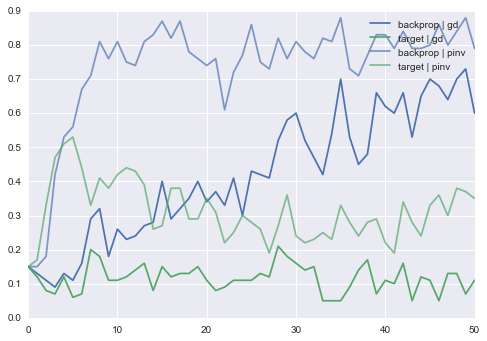

In [4]:
plt.figure()
with sns.color_palette(n_colors=2):
  plt.plot(acc[0,0,:], label='backprop | gd')
  plt.plot(acc[1,0,:], label='target | gd')
  plt.plot(acc[0,1,:], alpha=0.7, label='backprop | pinv')  
  plt.plot(acc[1,1,:], alpha=0.7, label='target | pinv')
plt.legend()
plt.show()

In [23]:
fls = os.listdir('./saves/AAA/')

In [9]:
os.listdir('./saves/AAA')

['0.pickle',
 '1.pickle',
 '10.pickle',
 '100.pickle',
 '101.pickle',
 '102.pickle',
 '103.pickle',
 '104.pickle',
 '105.pickle',
 '109.pickle',
 '11.pickle',
 '112.pickle',
 '114.pickle',
 '115.pickle',
 '116.pickle',
 '117.pickle',
 '118.pickle',
 '119.pickle',
 '12.pickle',
 '120.pickle',
 '121.pickle',
 '122.pickle',
 '123.pickle',
 '124.pickle',
 '125.pickle',
 '126.pickle',
 '127.pickle',
 '129.pickle',
 '13.pickle',
 '130.pickle',
 '131.pickle',
 '132.pickle',
 '134.pickle',
 '135.pickle',
 '138.pickle',
 '139.pickle',
 '14.pickle',
 '140.pickle',
 '141.pickle',
 '143.pickle',
 '144.pickle',
 '145.pickle',
 '147.pickle',
 '15.pickle',
 '151.pickle',
 '154.pickle',
 '156.pickle',
 '16.pickle',
 '164.pickle',
 '17.pickle',
 '174.pickle',
 '179.pickle',
 '18.pickle',
 '19.pickle',
 '198.pickle',
 '2.pickle',
 '204.pickle',
 '206.pickle',
 '21.pickle',
 '212.pickle',
 '214.pickle',
 '218.pickle',
 '22.pickle',
 '223.pickle',
 '224.pickle',
 '228.pickle',
 '230.pickle',
 '233.pickle'

In [7]:
import pickle
import os

In [10]:
cur_run = 'AAA'

In [17]:
params

array([[[ 2.34368508,  2.30018742,  2.22800047, ...,  1.85648432,
          1.9499653 ,  1.83395731],
        [ 2.34368508,  2.14179889,  2.04217865, ...,  1.83119594,
          1.91757787,  1.80975604]],

       [[ 2.34368508,  2.31654039,  2.253987  , ...,  2.25016334,
          2.23077193,  2.26228845],
        [ 2.34368508,  2.12772172,  1.96911149, ...,  1.94967274,
          2.08563858,  2.00802124]]])

In [19]:
params

{'alpha': 0.061498091,
 'alpha_t': 0.37648216,
 'layers': 3,
 'nonlin_thresh': 0.0010330788,
 'pinv_rcond': 0.18534076}

In [20]:
files = os.listdir('./saves/'+cur_run+'/')
dat = pickle.load(open('./saves/'+cur_run+'/'+files[0], 'rb'))
params = dat[0]
out = dat[-1]
for i,j in params.items():
  params[i] = [j]
for f in range(1, len(files)):
  dat = pickle.load(open('./saves/'+cur_run+'/'+files[f], 'rb'))
  for i,j in dat[0].items():
    params[i].append(j)
  out = np.dstack((out, dat[-1]))

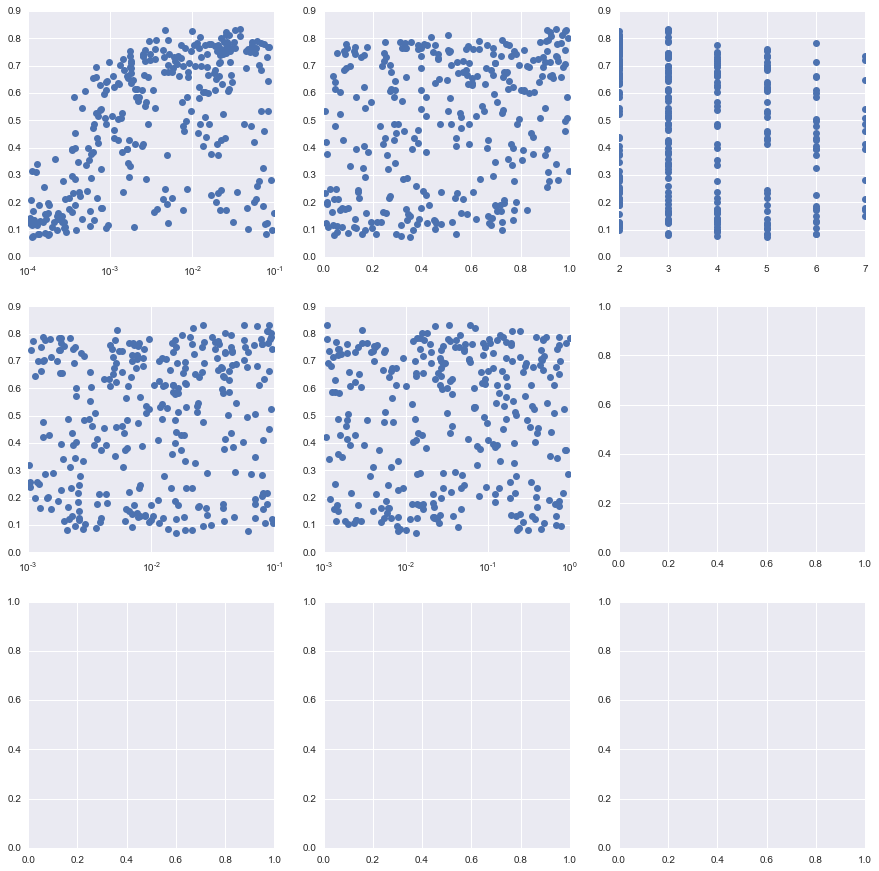

In [36]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

alg = 1
tra = 0

ax[0,0].plot(params['alpha'], out[alg, tra, :], 'o')
ax[0,0].set_xscale('log')

ax[0,1].plot(params['alpha_t'], out[alg, tra, :], 'o')
ax[0,2].plot(params['layers'], out[alg, tra, :], 'o')
ax[1,0].plot(params['nonlin_thresh'], out[alg, tra, :], 'o')
ax[1,0].set_xscale('log')
ax[1,1].plot(params['pinv_rcond'], out[alg, tra, :], 'o')
ax[1,1].set_xscale('log')



plt.show()

In [ ]:
batch_size=1
t_steps=2
layers=2
alpha=0.003
alpha_t=0.4
SGD=False
nonlinearity='tanh'

data = mnist_data()
data.inputs = np.array([[.5, 0]])
data.outputs = np.array([[0, .5]])

## Model parameters
m_dim = data.inputs.shape[1]
p_dim = data.outputs.shape[1]

algs = 2
training_algs = 2
l_dim = [m_dim] + (layers-1)*[2] + [p_dim]

# Forward weights
W  = np.zeros((algs, training_algs, layers+1), dtype=object)
dW = np.zeros((algs, training_algs, layers+1), dtype=object)
# Biases
b  = np.zeros((algs, training_algs, layers+1), dtype=object)
db = np.zeros((algs, training_algs, layers+1), dtype=object)
# Loss
L = np.zeros((algs, training_algs, t_steps+1))
accuracy = np.zeros((algs, training_algs, t_steps+1))

# Initialize
for k in range(algs):
  for j in range(training_algs):
    for l in range(1, layers+1):
      np.random.seed(l) # different random seed for each layer. Otherwise, same.
      W[k, j, l] = np.random.randn(l_dim[l-1], l_dim[l])/np.sqrt(l_dim[l-1])
      b[k, j, l] = 0.1*np.ones((1, l_dim[l]))

# Activations
x_1 = np.zeros((algs, training_algs, layers+1), dtype=object) # x_1 = W*x_3
x_2 = np.zeros((algs, training_algs, layers+1), dtype=object) # x_2 =   x_1 + b
x_3 = np.zeros((algs, training_algs, layers+1), dtype=object) # x_3 = f(x_2)

# Errors
dx_3 = np.zeros((algs, training_algs, layers+1), dtype=object)
dx_2 = np.zeros((algs, training_algs, layers+1), dtype=object)
dx_1 = np.zeros((algs, training_algs, layers+1), dtype=object)

# Targets
tx_3 = np.zeros((algs, training_algs, layers+1), dtype=object)
tx_2 = np.zeros((algs, training_algs, layers+1), dtype=object)
tx_1 = np.zeros((algs, training_algs, layers+1), dtype=object)

# Training
for t in range(t_steps+1):
  if t % 100 == 0:
    print t
  # Get data
  if SGD:
    x0, y = data.next_batch(batch_size)
  else:
    x0 = data.inputs[:batch_size]
    y = data.outputs[:batch_size]
  for k in range(algs):
    for j in range(training_algs):
      # Forward pass
      x_3[k, j, 0] = x0
      for l in range(1, layers+1):
        x_1[k, j, l] = matmul(x_3[k, j, l-1], W[k, j, l])
        x_2[k, j, l] = add(x_1[k, j, l], b[k, j, l])
        x_3[k, j, l] = tanh(x_2[k, j, l])

      # Backward pass
      dx_3[k, j, -1] = x_3[k, j, -1] - y # true for both MSE and cross-entropy softmax (?)
      tx_3[k, j, -1] = x_3[k, j, -1] - alpha_t*(x_3[k, j, -1] - y)
      for l in range(layers, 0, -1):
        if k == 0:
          # Backprop
          dx_2[k, j, l]   = dtanh(x_2[k, j, l]) * dx_3[k, j, l]
          dx_1[k, j, l]   = dx_2[k, j, l]
          dx_3[k, j, l-1] = matmul(dx_1[k, j, l], W[k, j, l].T)

          tx_2[k, j, l] = x_2[k, j, l] - alpha_t*dx_2[k, j, l]
          tx_1[k, j, l] = x_1[k, j, l] - alpha_t*dx_1[k, j, l]
          tx_3[k, j, l] = x_3[k, j, l] - alpha_t*dx_3[k, j, l]

        elif k == 1:
          # Target prop using inverses
          tx_2[k, j, l]   = x_2[k, j, l] + tanh_inv(tx_3[k, j, l]) - tanh_inv(x_3[k, j, l])
          tx_1[k, j, l]   = x_1[k, j, l] + add_inv(tx_2[k, j, l], b[k, j, l]) - add_inv(x_2[k, j, l], b[k, j, l]) # tx_1 = tx_2 - b
          tx_3[k, j, l-1] = x_3[k, j, l-1] + matmul_pinv(tx_1[k, j, l], W[k, j, l]) - matmul_pinv(x_1[k, j, l], W[k, j, l])

          dx_2[k, j, l]   = x_2[k, j, l] - tx_2[k, j, l]
          dx_1[k, j, l]   = x_1[k, j, l] - tx_1[k, j, l]
          dx_3[k, j, l-1] = x_3[k, j, l] - tx_3[k, j, l]

      # Update parameters
      for l in range(1, layers+1):
        if j == 0:
          # Gradient descent
          dW[k, j, l] = -alpha*np.dot(x_3[k, j, l-1].T, dx_1[k, j, l])/batch_size
          db[k, j, l] = -alpha*np.mean(dx_2[k, j, l], axis=0)
        if j == 1:
          # Psuedoinverse solution
          db[k, j, l] = np.mean(tx_2[k, j, l] - x_2[k, j, l], axis=0)
          dW[k, j, l] = np.dot(np.linalg.pinv(x_3[k, j, l-1], rcond=1e-2), (tx_1[k, j, l] - x_1[k, j, l]))
        W[k, j, l] = W[k, j, l] + dW[k, j, l]
        b[k, j, l] = b[k, j, l] + db[k, j, l]

      # Loss 
      L[k, j, t] = cross_entropy(y, x_3[k, j, -1])
      correct_prediction = np.equal(np.argmax(softmax(x_3[k, j, -1]), axis=1), np.argmax(y, axis=1))
      accuracy[k, j, t] = np.mean(correct_prediction.astype('float'))


In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(40,20))
for i in range(7):
  square_axes(fig, i)
#   if i % 2 or i == 0:
#     fig.axes[i].set_xlim(-5,5)
#     fig.axes[i].set_ylim(-5,5)

k = 1
j = 0

ax[-1].plot(y[0,0],y[0,1],'yo')
ax[0].plot(x_3[k, j, 0][0,0],x_3[k, j, 0][0,1],'o')
for l in range(2):
  ax[l*3+1].plot(x_1[k, j, l+1][0,0],x_1[k, j, l+1][0,1],'o')
  ax[l*3+2].plot(x_2[k, j, l+1][0,0],x_2[k, j, l+1][0,1],'o')
  ax[l*3+3].plot(x_3[k, j, l+1][0,0],x_3[k, j, l+1][0,1],'o')
ax[0].plot(dx_3[k, j, 0][0,0],dx_3[k, j, 0][0,1],'o')
for l in range(2):
  ax[l*3+1].plot(dx_1[k, j, l+1][0,0],dx_1[k, j, l+1][0,1],'o')
  ax[l*3+2].plot(dx_2[k, j, l+1][0,0],dx_2[k, j, l+1][0,1],'o')
  ax[l*3+3].plot(dx_3[k, j, l+1][0,0],dx_3[k, j, l+1][0,1],'o')
#ax[0].plot(tx_3[k, j, 0][0,0],tx_3[k, j, 0][0,1],'o')
for l in range(2):
  ax[l*3+1].plot(tx_1[k, j, l+1][0,0],tx_1[k, j, l+1][0,1],'o')
  ax[l*3+2].plot(tx_2[k, j, l+1][0,0],tx_2[k, j, l+1][0,1],'o')
  ax[l*3+3].plot(tx_3[k, j, l+1][0,0],tx_3[k, j, l+1][0,1],'o')

In [ ]:
plt.figure()
with sns.color_palette(n_colors=2):
  plt.plot(accuracy[0,0,:].T, label='backprop | gd')
  plt.plot(accuracy[1,0,:].T, label='target | gd')
  plt.plot(accuracy[0,1,:].T, alpha=0.7, label='backprop | pinv')  
  plt.plot(accuracy[1,1,:].T, alpha=0.7, label='target | pinv')
plt.legend()
plt.show()